# Gaussian process regression, GPR



In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


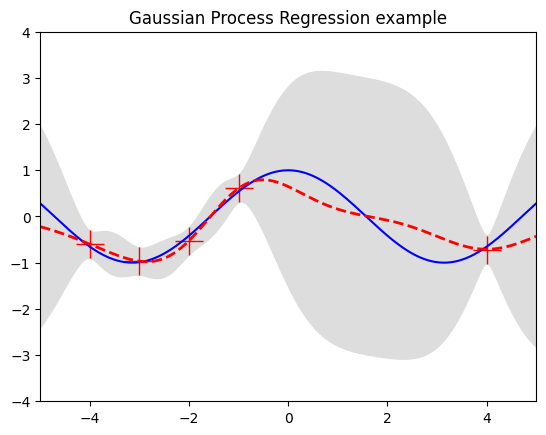

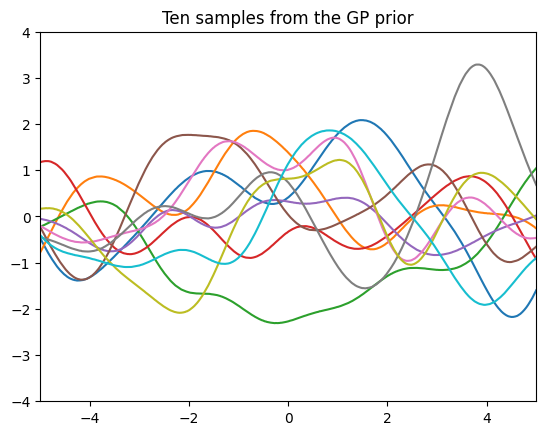

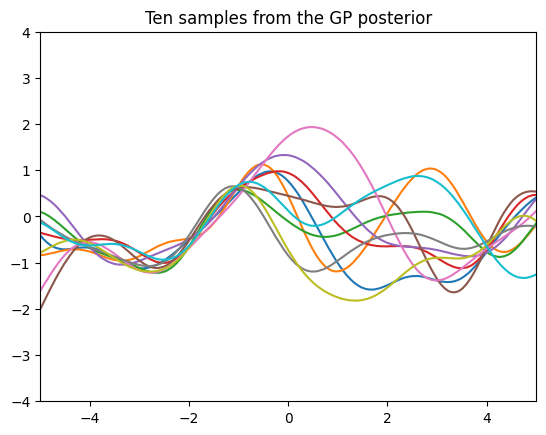

In [1]:
# GP regression example
# by st.watermelon

import numpy as np
import matplotlib.pyplot as plt


# kernel
def kernel(a, b):
    lam2 = 1
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2 * np.dot(a, b.T)
    return np.exp(-0.5 * sqdist / lam2)


# true function
def f(x):
    return np.cos(x).flatten()


# parameters
p = 500  # number of test points
s = 0.1  # noise std

# training points (given)
X = np.array([[-4], [-3], [-2], [-1], [4]])
m = X.shape[0]  # number of training points
y = f(X) + s * np.random.randn(m)  # (m,)

K = kernel(X, X)
L = np.linalg.cholesky(K + s**2 * np.eye(m))

# points for prediction
Xstar = np.linspace(-5, 5, p).reshape(-1, 1)

# posterior mean (mu)
Kstar = kernel(X, Xstar)
Lstar = np.linalg.solve(L, Kstar)
mu_pos = np.dot(Lstar.T, np.linalg.solve(L, y))

# posterior covariance
K2star = kernel(Xstar, Xstar)
Sig = K2star - np.dot(Lstar.T, Lstar)

s2 = np.diag(Sig)
s = np.sqrt(s2)

# plotting
plt.figure(1)
plt.clf()
plt.plot(X, y, "r+", ms=20)
plt.plot(Xstar, f(Xstar), "b-")
plt.gca().fill_between(Xstar.flat, mu_pos - 3 * s, mu_pos + 3 * s, color="#dddddd")
plt.plot(Xstar, mu_pos, "r--", lw=2)
plt.title("Gaussian Process Regression example")
plt.axis([-5, 5, -4, 4])


# samples from the prior
L = np.linalg.cholesky(K2star + 1e-6 * np.eye(p))
f_prior = np.dot(L, np.random.normal(size=(p, 10)))
plt.figure(2)
plt.clf()
plt.plot(Xstar, f_prior)
plt.title("Ten samples from the GP prior")
plt.axis([-5, 5, -4, 4])


# samples from the posterior
L = np.linalg.cholesky(K2star + 1e-6 * np.eye(p) - np.dot(Lstar.T, Lstar))
f_post = mu_pos.reshape(-1, 1) + np.dot(L, np.random.normal(size=(p, 10)))
plt.figure(3)
plt.clf()
plt.plot(Xstar, f_post)
plt.title("Ten samples from the GP posterior")
plt.axis([-5, 5, -4, 4])

plt.show()